In [38]:
import numpy as np
import pandas as pd
# settings to display all columns
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

**Note:** 'well', 'pump', 'watersource', etc. etc. are all used interchangeably to refer to the target, which is its function status

In [39]:
# import well status and data information
status = pd.read_csv('../../data/status.csv', index_col='id')
data = pd.read_csv('../../data/data.csv', index_col='id')

In [40]:
# merge both on pump id
df = pd.merge(status, data, on='id')

In [41]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.head()

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [42]:
# status counts
df['status_group'].value_counts()

functional                 32237
non functional             22813
functional needs repair     4314
Name: status_group, dtype: int64

<AxesSubplot:ylabel='status_group'>

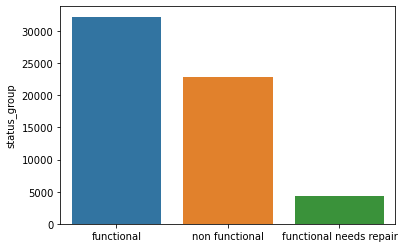

In [43]:
# visualize
sns.barplot(x=df['status_group'].value_counts().index, y=df['status_group'].value_counts())

In [44]:
# combine 'functional needs repair' into 'non functional'
df.loc[df['status_group'] == 'functional needs repair', 'status_group'] = 'non functional'

<AxesSubplot:ylabel='status_group'>

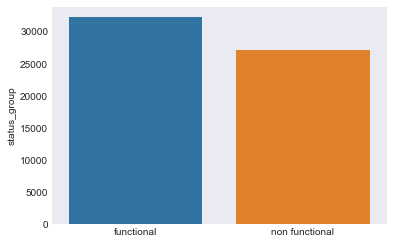

In [49]:
# visualize
## Jen - add pretty labels with capitals, bigger fonts
fig, ax = plt.subplots()
plt.style.use('seaborn-talk')
sns.barplot(x=df['status_group'].value_counts().index, y=df['status_group'].value_counts())
# ax.set_title('')
# ax.set_xlabel('')
# ax.set_ylabel('')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59364 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59364 non-null  object 
 1   amount_tsh             59364 non-null  float64
 2   date_recorded          59364 non-null  object 
 3   funder                 55729 non-null  object 
 4   gps_height             59364 non-null  int64  
 5   installer              55709 non-null  object 
 6   longitude              59364 non-null  float64
 7   latitude               59364 non-null  float64
 8   wpt_name               59364 non-null  object 
 9   num_private            59364 non-null  int64  
 10  basin                  59364 non-null  object 
 11  subvillage             58993 non-null  object 
 12  region                 59364 non-null  object 
 13  region_code            59364 non-null  int64  
 14  district_code          59364 non-null  int64  
 15

In [51]:
df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59364.000000,59364.000000,59364.000000,5.936400e+04,59364.000000,59364.000000,59364.000000,59364.000000,59364.000000
mean,317.843017,668.702513,34.097560,-5.709463e+00,0.474429,15.295516,5.631494,180.019086,1301.441227
std,2998.473133,693.131013,6.517065,2.943608e+00,12.239934,17.592619,9.636138,471.604294,951.369704
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.095187,-8.541904e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,370.000000,34.910318,-5.023822e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1320.000000,37.179490,-3.326918e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [52]:
# separate into numerical and categorical features
cat_cols = []
num_cols = []
for col in df.columns:
    if df[col].dtype in ['object']:
        cat_cols.append(col)
    else:
        num_cols.append(col)

In [63]:
cat_cols

['status_group',
 'date_recorded',
 'funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

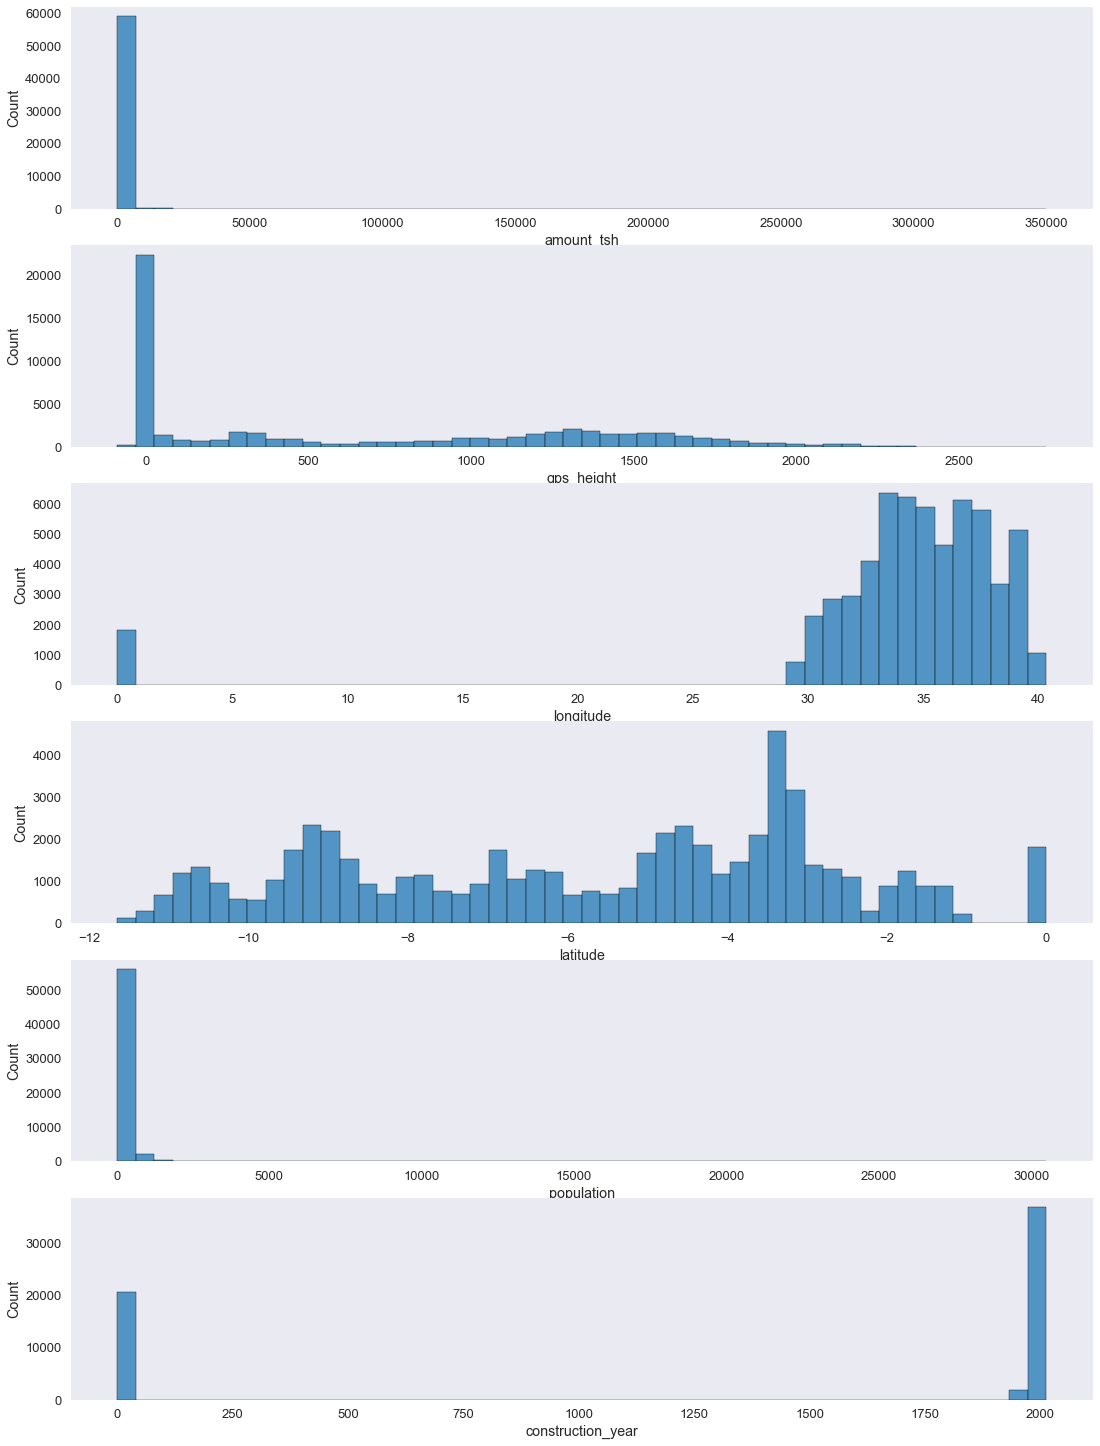

In [55]:
# visualize numericals
fig, axes = plt.subplots(nrows=6,figsize=(15,20))
plt.tight_layout()
for i, col in enumerate(['amount_tsh','gps_height','longitude','latitude','population',
                         'construction_year']):
#     r = i//3
#     c = i%3
    sns.histplot(df[col], bins=50, ax=axes[i])

In [81]:
# check out upper tail of amount_tsh
df['amount_tsh'].sort_values(ascending=False).head(30)

id
41564    350000.0
4128     250000.0
7860     200000.0
70107    170000.0
54154    138000.0
15191    120000.0
71707    117000.0
15801    117000.0
64148    117000.0
38117    117000.0
18724    117000.0
7737     117000.0
4712     117000.0
45188    100000.0
10996    100000.0
69674    100000.0
65614     70000.0
58336     60000.0
24876     50000.0
13946     50000.0
35268     50000.0
3252      50000.0
73818     45000.0
28057     45000.0
30855     45000.0
40048     40000.0
73094     40000.0
28620     40000.0
48346     40000.0
50998     40000.0
Name: amount_tsh, dtype: float64

In [56]:
# check out upper tail of population
df['population'].sort_values(ascending=False).head(30)

id
12169    30500
49354    15300
30750    11463
63349    10000
56570    10000
21166    10000
33117     9865
18520     9500
16664     9000
17459     9000
69166     9000
72820     8848
2118      8600
42967     8500
41994     8200
36272     8000
61539     8000
42627     8000
6280      8000
64021     8000
11002     7530
11571     7500
60098     7500
13182     7500
15841     7000
9941      7000
2713      6922
5         6922
29054     6922
9127      6922
Name: population, dtype: int64

In [62]:
# percent 0 in each column
(df == 0).sum(axis=0)/len(data)*100

amount_tsh               70.099327
date_recorded             0.000000
funder                    0.000000
gps_height               34.407407
installer                 0.000000
longitude                 3.050505
latitude                  0.000000
wpt_name                  0.000000
num_private              98.725589
basin                     0.000000
subvillage                0.000000
region                    0.000000
region_code               0.000000
district_code             0.038721
lga                       0.000000
ward                      0.000000
population               35.994949
public_meeting            8.510101
recorded_by               0.000000
scheme_management         0.000000
scheme_name               0.000000
permit                   29.447811
construction_year        34.863636
extraction_type           0.000000
extraction_type_group     0.000000
extraction_type_class     0.000000
management                0.000000
management_group          0.000000
payment             

### Importance of 0s per column
**Note:** it doesn't matter that `amount_tsh` has a bunch of 0s. The data dictionary describes it as "amount_tsh - Total static head (amount water available to waterpoint)". This might seem quite bad, because this makes it sound like the total water available is 0 for over 70% of water points. However, this is an incorrect description for Total Static Head, as shown [here](images/total_static_head.jpeg). It's simply the distance from the surface of the source to the surface of the access point, so actually having '0' is a good thing.

In [77]:
# percent null in each column
df.isna().sum()/len(data)*100

status_group              0.000000
amount_tsh                0.000000
date_recorded             0.000000
funder                    6.123240
gps_height                0.000000
installer                 6.156930
longitude                 0.000000
latitude                  0.000000
wpt_name                  0.000000
num_private               0.000000
basin                     0.000000
subvillage                0.624958
region                    0.000000
region_code               0.000000
district_code             0.000000
lga                       0.000000
ward                      0.000000
population                0.000000
public_meeting            5.582508
recorded_by               0.000000
scheme_management         6.530894
scheme_name              47.400782
permit                    5.147901
construction_year         0.000000
extraction_type           0.000000
extraction_type_group     0.000000
extraction_type_class     0.000000
management                0.000000
management_group    

In [66]:
for col in cat_cols:
    print(f'{col}:')
    print(df[col].value_counts(normalize=True))
    print('<>'*5)

status_group:
functional        0.54304
non functional    0.45696
Name: status_group, dtype: float64
<><><><><>
date_recorded:
2011-03-15    0.009635
2011-03-17    0.009400
2013-02-03    0.009197
2011-03-14    0.008760
2011-03-16    0.008642
                ...   
2011-09-14    0.000017
2012-01-25    0.000017
2004-04-05    0.000017
2011-09-19    0.000017
2011-09-12    0.000017
Name: date_recorded, Length: 356, dtype: float64
<><><><><>
funder:
Government Of Tanzania         0.162860
Danida                         0.055878
Hesawa                         0.039441
Rwssp                          0.024619
World Bank                     0.024206
                                 ...   
Goldwill Foundation            0.000018
Tanz/egypt Technical  Co-op    0.000018
Yaole                          0.000018
Mwakabalula                    0.000018
Tasad                          0.000018
Name: funder, Length: 1897, dtype: float64
<><><><><>
installer:
DWE                     0.312068
Government    

communal standpipe    0.583098
hand pump             0.294219
other                 0.107422
improved spring       0.013190
cattle trough         0.001954
dam                   0.000118
Name: waterpoint_type_group, dtype: float64
<><><><><>


In [67]:
df[cat_cols].describe()

,status_group,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59364,59364,55729,55709,59364,59364,58993,59364,59364,59364,56050,59364,55487,31225,56308,59364,59364,59364,59364,59364,59364,59364,59364,59364,59364,59364,59364,59364,59364,59364,59364
unique,2,356,1897,2145,37400,9,19287,21,125,2092,2,1,12,2696,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,functional,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Shuleni,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,32237,572,9076,17385,3561,10212,505,5294,2503,307,50996,59364,36779,682,38838,26776,26776,26776,40493,52456,25337,25337,50785,50785,33165,33165,17020,17020,45764,28516,34615


In [86]:
((df[cat_cols] == 'None')|(df[cat_cols] == 'none')).sum(axis=0)/len(data)*100

status_group             0.000000
date_recorded            0.000000
funder                   0.003369
installer                0.000000
wpt_name                 6.001954
basin                    0.000000
subvillage               0.000000
region                   0.000000
lga                      0.000000
ward                     0.000000
public_meeting           0.000000
recorded_by              0.000000
scheme_management        0.001685
scheme_name              1.126946
permit                   0.000000
extraction_type          0.000000
extraction_type_group    0.000000
extraction_type_class    0.000000
management               0.000000
management_group         0.000000
payment                  0.000000
payment_type             0.000000
water_quality            0.000000
quality_group            0.000000
quantity                 0.000000
quantity_group           0.000000
source                   0.000000
source_type              0.000000
source_class             0.000000
waterpoint_typ

In [87]:
((df[cat_cols] == 'Unknown')|(df[cat_cols] == 'unknown')).sum(axis=0)/len(data)*100

status_group              0.000000
date_recorded             0.000000
funder                    0.006738
installer                 0.006738
wpt_name                  0.005054
basin                     0.000000
subvillage                0.000000
region                    0.000000
lga                       0.000000
ward                      0.000000
public_meeting            0.000000
recorded_by               0.000000
scheme_management         0.000000
scheme_name               0.000000
permit                    0.000000
extraction_type           0.000000
extraction_type_group     0.000000
extraction_type_class     0.000000
management                0.945017
management_group          0.945017
payment                  13.701907
payment_type             13.701907
water_quality             3.155111
quality_group             3.155111
quantity                  1.329088
quantity_group            1.329088
source                    0.111178
source_type               0.000000
source_class        

Categorical determinations:
- date_recorded - drop
- funder - maybe keep? use with fancy encoder
- installer - fancy encoder
- wpt_name - drop
- basin - FE
- subvillage - too many, drop
- region - use instead of region_code and district_code
- lga - FE (*droppable*)
- ward - drop
- public_meeting - drop
- recorded_by - drop
- secheme_magnement - FE
- secheme_neme - drop
- permit - binary encode
- extraction_type & extraction_type_group - drop
- extraction_type_class - keep, encode
- management - drop
- management_group - FE
- payment - FE
- payment_type - drop (*droppable*)
- water_quality - drop
- quality_group - FE
- quantity - FE
- quantity_group - drop (same)
- source over source_type, keep source_class
- waterpoint_type_group over waterpoint_type

### Testing categorial columns for importance

Do 

In [ ]:
def check_feat_importance(data,col):
    temp = data.groupby([col, 'status_group']).size()/len(data)*100
    temp.reset_index('total_perc')
    rel = temp[col]
    
    
    temp.columns = [col, 'status_group', 'total_perc']

In [68]:
df[df['permit'] == True]['status_group'].value_counts(normalize=True)

functional        0.554405
non functional    0.445595
Name: status_group, dtype: float64

In [76]:
temp = df.groupby(['extraction_type', 'status_group']).size()/len(data)*100
temp.reset_index(name='total_perc')

,extraction_type,status_group,total_perc
0,afridev,functional,2.018519
1,afridev,non functional,0.959596
2,cemo,functional,0.075758
3,cemo,non functional,0.075758
4,climax,functional,0.013468
5,climax,non functional,0.040404
6,gravity,functional,27.013468
7,gravity,non functional,18.063973
8,india mark ii,functional,2.434343
9,india mark ii,non functional,1.602694


In [73]:
df.groupby(['management','status_group']).size()

management        status_group  
company           functional          22.250000
                  non functional      34.833333
other             functional          42.083333
                  non functional      28.250000
other - school    functional           1.916667
                  non functional       6.333333
parastatal        functional          84.916667
                  non functional      62.250000
private operator  functional         123.000000
                  non functional      41.250000
trust             functional           3.833333
                  non functional       2.666667
unknown           functional          18.666667
                  non functional      28.083333
vwc               functional        1701.333333
                  non functional    1673.083333
water authority   functional          37.166667
                  non functional      38.166667
water board       functional         180.833333
                  non functional      63.583333
wua    

In [55]:
df.groupby(['status_group','water_quality']).size()/len(data)*100

status_group             water_quality     
functional               coloured               0.414393
                         fluoride               0.254363
                         fluoride abandoned     0.010107
                         milky                  0.737821
                         salty                  3.739640
                         salty abandoned        0.293107
                         soft                  48.409811
                         unknown                0.444714
functional needs repair  coloured               0.090964
                         fluoride               0.021899
                         milky                  0.023583
                         salty                  0.379018
                         salty abandoned        0.121286
                         soft                   6.571323
                         unknown                0.058958
non functional           coloured               0.320059
                         fluoride           

In [90]:
drop_cols = ['num_private', 'region_code', 'district_code', 'date_recorded', 
             'wpt_name', 'subvillage', 'ward', 'public_meeting',
             'recorded_by', 'scheme_name', 'extraction_type', 'extraction_type_group',
             'management', 'payment_type', 'water_quality', 'quantity_group',
             'source_type', 'waterpoint_type']
df_trim = df.drop(columns=drop_cols, inplace=True)

In [91]:
num_cols = []
ohe_cols = []
freq_cols = []

for c in df_trim.columns:
    if df_trim[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif df_trim[c].nunique() < 10:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)
        
print(num_cols, ohe_cols, freq_cols)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'construction_year'] ['status_group', 'basin', 'permit', 'extraction_type_class', 'management_group', 'payment', 'quality_group', 'quantity', 'source_class', 'waterpoint_type_group'] ['funder', 'installer', 'region', 'lga', 'scheme_management', 'source']


In [100]:
(data['longitude'] == 0).sum()

1777

In [101]:
(data['latitude'] == 0).sum()

0

In [103]:
data[data['longitude'] == 0]['latitude'].value_counts()

-2.000000e-08    1777
Name: latitude, dtype: int64

In [122]:
df.isna().sum()

status_group                0
amount_tsh                  0
funder                   3635
gps_height                  0
installer                3655
longitude                   0
latitude                    0
basin                       0
region                      0
lga                         0
population                  0
scheme_management        3877
permit                   3056
construction_year           0
extraction_type_class       0
management_group            0
payment                     0
quality_group               0
quantity                    0
source                      0
source_class                0
waterpoint_type_group       0
dtype: int64

In [123]:

df['binary_status'] = df['status_group'] != 'non functional'

df.head()

,status_group,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,lga,...,construction_year,extraction_type_class,management_group,payment,quality_group,quantity,source,source_class,waterpoint_type_group,binary_status
id,,,,,,,,,,,,,,,,,,,,,
69572,functional,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,Ludewa,...,1999,gravity,user-group,pay annually,good,enough,spring,groundwater,communal standpipe,True
8776,functional,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,Serengeti,...,2010,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,True
34310,functional,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,Simanjiro,...,2009,gravity,user-group,pay per bucket,good,enough,dam,surface,communal standpipe,True
67743,non functional,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,Nanyumbu,...,1986,submersible,user-group,never pay,good,dry,machine dbh,groundwater,communal standpipe,False
19728,functional,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,Karagwe,...,0,gravity,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,True


In [124]:
y = df['binary_status']
X = df.drop(['status_group', 'binary_status'], axis=1)
X.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,lga,population,...,permit,construction_year,extraction_type_class,management_group,payment,quality_group,quantity,source,source_class,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,Ludewa,109,...,False,1999,gravity,user-group,pay annually,good,enough,spring,groundwater,communal standpipe
8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,Serengeti,280,...,True,2010,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe
34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,Simanjiro,250,...,True,2009,gravity,user-group,pay per bucket,good,enough,dam,surface,communal standpipe
67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,...,True,1986,submersible,user-group,never pay,good,dry,machine dbh,groundwater,communal standpipe
19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,Karagwe,0,...,True,0,gravity,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe


In [125]:
num_cols = []
ohe_cols = []
freq_cols = []

for c in df.columns:
    if df[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif df[c].nunique() < 10:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)
        
print(num_cols, ohe_cols, freq_cols)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'construction_year'] ['status_group', 'basin', 'permit', 'extraction_type_class', 'management_group', 'payment', 'quality_group', 'quantity', 'source_class', 'waterpoint_type_group', 'binary_status'] ['funder', 'installer', 'region', 'lga', 'scheme_management', 'source']


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 396)

In [127]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((44523, 21), (44523,), (14841, 21), (14841,))

### Pre-modeling transformations

**NUMERIC COLUMNS**

-Create new t/f columns for construction year and population
- MinMaxScaler - assumes normal distribution
- IterativeImputer
    - population
    - construction year
    - lat/long - 0's only incorrect in longitude 

**CATEGORICAL COLUMNS**
- Fill in blanks w/ sklearn.impute.IterativeImputer¶



In [130]:
# transform incorrect long/lat to nulls 
X_train.loc[(X_train['longitude']== 0), ('longitude','latitude')] = np.nan


C:\Users\alexm\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [134]:
X_test.loc[(X_test['longitude']== 0), ('longitude','latitude')] = np.nan

C:\Users\alexm\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14841 entries, 51649 to 15879
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             14841 non-null  float64
 1   funder                 13961 non-null  object 
 2   gps_height             14841 non-null  int64  
 3   installer              13957 non-null  object 
 4   longitude              14410 non-null  float64
 5   latitude               14410 non-null  float64
 6   basin                  14841 non-null  object 
 7   region                 14841 non-null  object 
 8   lga                    14841 non-null  object 
 9   population             14841 non-null  int64  
 10  scheme_management      13857 non-null  object 
 11  permit                 14098 non-null  object 
 12  construction_year      14841 non-null  int64  
 13  extraction_type_class  14841 non-null  object 
 14  management_group       14841 non-null  object 
 15

(1900.0, 2050.0)

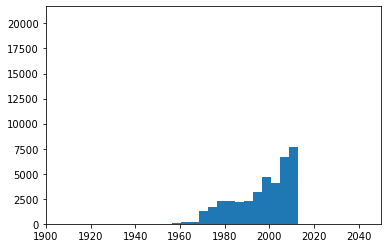

In [87]:
fig, ax = plt.subplots()

ax.hist(df['construction_year'], bins=500)

ax.set_xlim(1900, 2050)


(0.0, 5000.0)

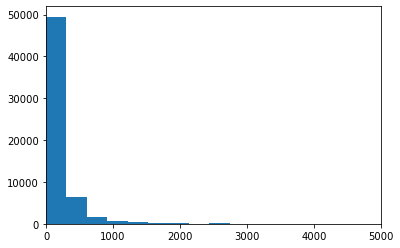

In [89]:
fig, ax = plt.subplots()

ax.hist(df['population'], bins=100)

ax.set_xlim(0, 5000)


### Post-Split Transformations

In [94]:
it_impute = IterativeImputer(random_state=396)

X_train_itimp = it_impute.fit_transform(X_train)

ValueError: could not convert string to float: 'Government Of Tanzania'

In [ ]:




num_col_transform = Pipeline( steps =[
    ('scaler', MinMaxScaler())
    ])

sml_cat_col_transform = Pipeline(steps =[
    ('ohe', OneHotEncoder())
])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline


df = pd.read_csv('../../data/trimmed_data1025.csv', index_col='id')
df.head()

df['status_group'].value_counts()

df.head()

df.isna().sum()


df['binary_status'] = df['status_group'] != 'non functional'

df.head()

y = df['binary_status']
X = df.drop(['status_group', 'binary_status'], axis=1)
X.head()

num_cols = []
ohe_cols = []
freq_cols = []

for c in df.columns:
    if df[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif df[c].nunique() < 10:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)
        
print(num_cols, ohe_cols, freq_cols)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 396)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

### Pre-modeling transformations

**NUMERIC COLUMNS**

-Create new t/f columns for construction year and population
- MinMaxScaler - assumes normal distribution
- IterativeImputer
    - population
    - construction year
    - lat/long - 0's only incorrect in longitude 

**CATEGORICAL COLUMNS**
- Fill in blanks w/ sklearn.impute.IterativeImputer¶





# transform incorrect long/lat to nulls 
X_train.loc[(X_train['longitude']== 0), ('longitude','latitude')] = np.nan


X_test.loc[(X_test['longitude']== 0), ('longitude','latitude')] = np.nan



fig, ax = plt.subplots()

ax.hist(df['construction_year'], bins=500)

ax.set_xlim(1900, 2050)


fig, ax = plt.subplots()

ax.hist(df['population'], bins=100)

ax.set_xlim(0, 5000)


### Post-Split Transformations

it_impute = IterativeImputer(random_state=396)

X_train_itimp = it_impute.fit_transform(X_train)





num_col_transform = Pipeline( steps =[
    ('scaler', MinMaxScaler())
    ])

sml_cat_col_transform = Pipeline(steps =[
    ('ohe', OneHotEncoder())
])